1/1 [==============================] - 0s 85ms/step


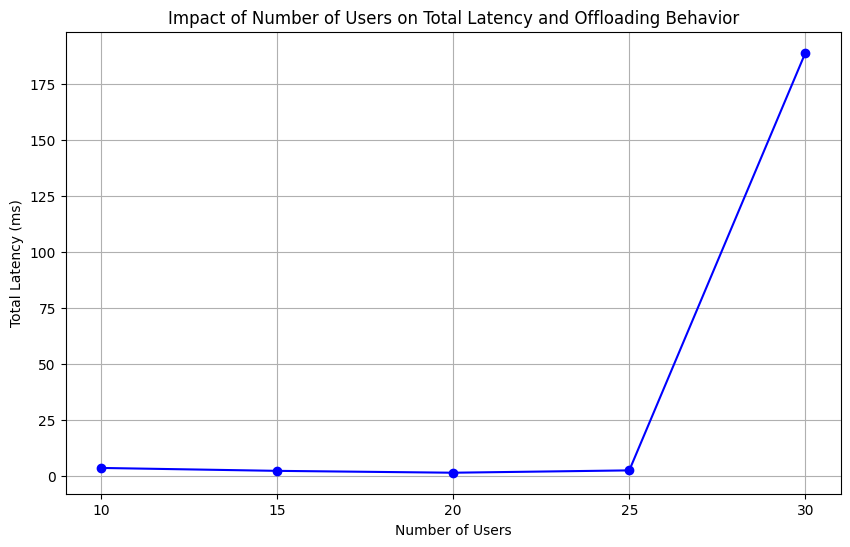

In [29]:
# Assuming you have the EdgeComputingEnvironment and DDQNAgent defined as per your code
env = EdgeComputingEnvironment()

# Define the number of users/devices to test
user_counts = [10, 15, 20, 25, 30]

# Define the number of episodes for training and testing steps
num_train_episodes = 1  # or any suitable number for training
num_test_steps = 1  # or any suitable number for testing

# Create the folder for DDQN model files if it doesn't exist
model_folder = 'DDQN_Models_Test_Users'
os.makedirs(model_folder, exist_ok=True)

# Set Size of the area in which users are distributed
env.area_size = 1000

# Storage for results
results = []

# Train and save DDQN models for different user counts
for num_users in user_counts:
    env.num_users = num_users  # Set the number of users in the environment

    # Reinitialize the agent with the updated environment
    agent = DDQNAgent(env, num_users)

    # Train the agent
    agent.train(num_train_episodes)

    # Save the model for this configuration
    model_filename = os.path.join(model_folder, f'DDQN_model_Users{num_users}.h5')
    agent.save(model_filename)

# Test and collect metrics
for num_users in user_counts:
    # Load the model for this configuration
    model_filename = os.path.join(model_folder, f'DDQN_model_Users{num_users}.h5')
    agent.load(model_filename)

    env.num_users = num_users  # Set the number of users in the environment

    # Test the agent and get the average delay and alpha
    avg_delay, avg_alpha = agent.test(num_test_steps)

    # Store the results
    results.append({
        'num_users': num_users,
        'avg_delay': avg_delay,
    })

# Save the results to a file
with open('DDQN_users_results.json', 'w') as f:
    json.dump(results, f)

# Prepare data for plotting
delays_data = []

# Fill the data lists
for result in results:
    delays_data.append(result['avg_delay'])

# Plotting the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for delay
ax1.plot(user_counts, delays_data, marker='o', label='Total Latency (ms)', color='blue')
ax1.set_xlabel("Number of Users")
ax1.set_ylabel("Total Latency (ms)")
ax1.set_title("Impact of Number of Users on Total Latency and Offloading Behavior")

# Modify x-axis to only display the user counts, without intermediate values
ax1.set_xticks(user_counts)

ax1.grid(True)

# Show the plot
plt.show()
